### Ensemble Models   
Ensemble learning is a general meta approach to machine learning   
that seeks better predictive performance by combining the predictions from multiple models.   
The three main classes of ensemble learning methods are bagging, stacking, and boosting.  

**Bagging**: fit many decision trees on different samples of the same dataset and average the predictions.   
**Stacking**: fit many different models types on the same data and use another model to learn how to best combine the predictions.   
**Boosting**: add ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.   

Ensemble models group a set of **weak learners** and form a **strong learner** by voting or averaging the findings of weak learners.  


#### Bagging   

Building classifiers from randomly resampled data.  

Bootstrap aggregating or bagging. Abbreviation of Bootstrap AGGregatING.   

Data is taken from the original dataset S times to make S new datasets, all of the same size.  
Each dataset is built by randomly selecting an example from the original **with replacement**.   
The <u>bootstrap method</u> is a resampling technique used to estimate statistics on a population  
by sampling a dataset with replacement.  

After the S datasets are built, a learning algorithm is applied to each one individually.  
To classify a new piece of data, S classifiers to the new piece of data and take a majority vote.  

These multi datasets are used to train multiple models in parallel.  
In <u>regression</u>, the average of all the predictions from different ensemble models is calculated.    
In <u>classification</u>, the majority vote gained from the voting mechanism is considered.    
Bagging decreases the variance and tunes the prediction to an expected outcome.  

The **Random Forest** model uses Bagging, where decision tree models with higher variance are present.  
It makes random feature selection to grow trees. Several random trees make a Random Forest.

##### Bagging  
involves fitting many decision trees on different samples of the same dataset  
and averaging the predictions.

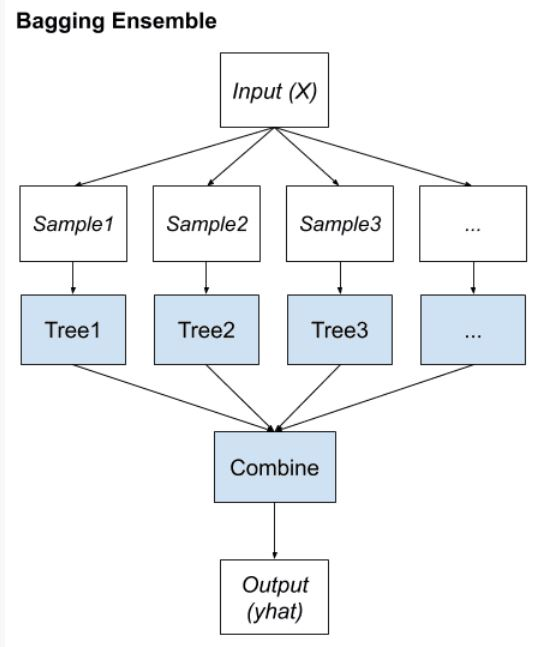

In [1]:
from IPython.display import Image
Image('../Figures/bagging_ensemble.jpg', width=250)

##### Stacking   
involves fitting many different models types on the same data   
and using another model to learn how to best combine the predictions.

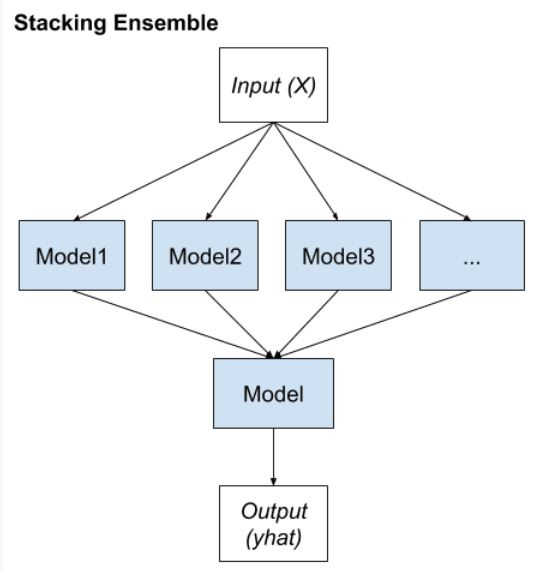

In [2]:
Image('../Figures/stacking_ensemble.jpg', width=250)

##### Boosting  
involves adding ensemble members sequentially that correct   
the predictions made by prior models and outputs a weighted average of the predictions.  

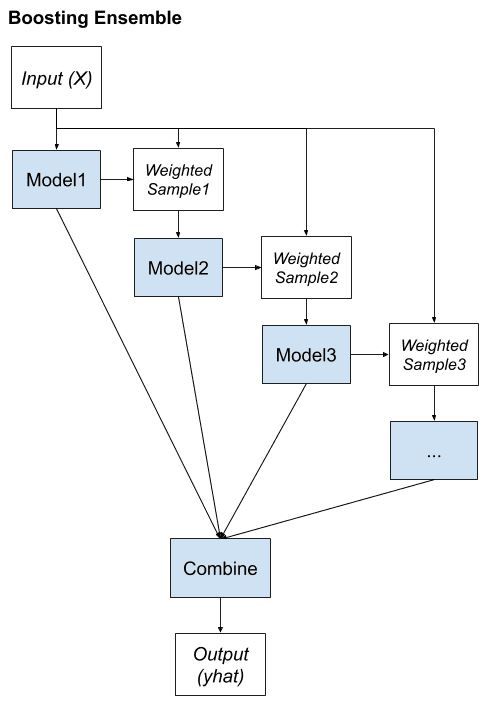

In [3]:
Image('../Figures/boostng_ensemble.jpg', width=250)

---
#### Boosting  

Boosting technique is similar to bagging.  
In boosting and bagging, we use the same type of classifier.  
But in boosting, the different classifiers are trained sequentially.  

Each new classifier is trained based on the performance of those already trained.  
Boosting makes new classifiers focusing on data that was misclassified by previous classifiers.  
It iteratively adjusts the weight of observation as per the last classification.  

In boosting, the output is calculated from a weighted sum of all classifiers.  
The weights aren’t equal as in bagging but are based on how successful the classifier was in the previous iteration.  

Boosting converts a weak learner to a stronger one.  
It decreases the bias error and builds strong predictive models.  

The **AdaBoost** uses Boosting techniques, where a 50% less error is required to maintain the model.  
Here, Boosting can keep or discard a single learner. Otherwise, the iteration is repeated until achieving a better learner.

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

import sklearn
import xgboost

In [5]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X = bc.data
y = bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# Pipeline Estimator
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))
pipeline.fit(X_train, y_train)

print(f'Model test Score:     {pipeline.score(X_test, y_test):.3f}\nModel training Score: {pipeline.score(X_train, y_train):.3f}')

Model test Score:     0.965
Model training Score: 0.991


#### Bagging and Boosting: Similarities  
They are ensemble methods focused on getting N learners from a single learner.  
They make random sampling and generate several training data sets.   
They arrive upon the end decision by making an average of N learners or taking the voting rank of the predictions.  
They reduce variance and provide higher stability with minimizing errors.

#### Bagging and Boosting: Differences   

|bagging|boosting|  
|-|-|  
|merges the same type of predictions|merges different types of predictions|  
|decreases variance, solves over-fitting|decreases bias, not variance|  
|each model receives an equal weight|models are weighed based on their performance|  
|models are built independently|new models are affected by previous  model's performance|  
|training data are drawn randomly with a replacement|new subset is of misclassified elements|  
|use if the classifier has a high variance|if the classifier has a high bias|  

### Some boosting models  
1. Adaptive Boosting (AdaBoost)
2. eXtreme Gradient Boosting (XGBoost)  
3. Light Gradient Boosting Method (LightGBM)
4. Category Boosting (CatBoost).   

<u>Refer</u>   
[pipeline](https://scikit-learn.org/stable/modules/compose.html)   
[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(X_train, y_train)
score = adaboost.score(X_test, y_test)
score

0.9440559440559441

In [8]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05).fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_test, y_test)],verbose = False)
score_xgb = xgboost.score(X_test,y_test)
score_xgb

0.951048951048951

#### Poisonous Mushroom   

In [9]:
#  https://www.kaggle.com/uciml/mushroom-classification
df = pd.read_csv("../Data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
print('\nUnique value count')
for col in df.columns:
    print(col, len(df[col].unique()))


Unique value count
class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 5
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


In [11]:
# drop a column with only one distinct value
df = df.drop("veil-type", axis=1)

Convert the dataset to numbers by encoding it.  
Scikit-Learn LabelEncoder() converts labels to numbers.   

In [12]:
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

Split the dataset into a target matrix Y and a feature matrix X.  
Make training and test sets.  
Normalise the data.  

In [13]:
X = df.loc[:, df.columns != 'class']
Y = df['class']  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use AdaBoostClassifier to classify the mushroom  as **poisonous or edible**.

The method has the following parameters:

1. base_estimator: The boosted ensemble is built from this parameter. If None, the value is DecisionTreeClassifier(max_depth=1).  
2. n_estimators: The upper limit in estimators at which boosting is terminated with a default value of 50. If there is a perfect fit, learning is stopped early.  
3. learning_rate: The learning rate reduces the contribution of the classifier by this value. It has a default value of 1.  
4. algorithm: Default value of `SAMME` (Stagewise Additive Modeling using a Multi-class Exponential loss function).  [Ref](https://hastie.su.domains/Papers/samme.pdf)  
5. random_state: Seed used by the random number generator.   

In [14]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(X_train, y_train)
score = adaboost.score(X_test, y_test)
score

0.9848236259228876

In [15]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05).fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_test, y_test)],verbose = False)
score_xgb = xgboost.score(X_test,y_test)
score_xgb

1.0